<a href="https://colab.research.google.com/github/cerqueirapedro/data_science/blob/master/Analise_de_Dados_UBS_prova_pratica_Pedro_Cerqueira_Bolsista_Nivel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

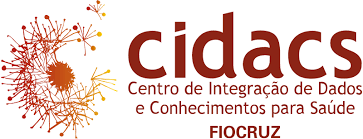

#### **Segunda etapa - Prova prática - BOLSISTA PRODUÇÃO DE DADOS - NÍVEL 1 (BÁSICO)**
*by [Pedro Cerqueira](https://www.linkedin.com/in/pedro-henrique-cerqueira/)*

---

<center><img alt="Analisando UBS" width="80%" src="https://www.cnm.org.br/cms/images/stories/comunicacao_novo/saude/29062018_UBS.jpg"></center>

# Análise dos Dados das Unidades Básicas de Saúde (UBS) - *Brasil*

As Unidades Básicas de Saúde (UBS) são a porta de entrada preferencial do Sistema Único de Saúde (SUS). O objetivo desses postos é atender até 80% dos problemas de saúde da população, sem que haja a necessidade de encaminhamento para outros serviços, como emergências e hospitais.

**Neste *notebook*, iremos analisar os dados referentes à Unidade Básica de Saúde (UBS), dados estes disponibilizados pelo Ministério da Saúde do Brasil, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/cidacslab/npd_introducing/master/candidates/ubs.csv')

## Análise dos Dados


**Dicionário das variáveis**


* cod_munic: IBGE code, lenght: 7 characters.
* dsc_bairro: Name of neighborhood.
* dsc_cidade: Name of city.
* cod_cnes: CNES code
* nom_estab: Name of the establishment
* dsc_endereco: Address of UBS
* dsc_estrut_fisic_ambiencia: Situation-related to general structure
* dsc_adap_defic_fisic_idosos: Situation-related to adaptations for the disabled and the elderly
* dsc_equipamentos: Situation-related to equipament
* dsc_medicamentos: Situation-related to medicine
* data_eq: Date variable

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,data_eq
0,-10.911237,-37.062078,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,7931791326,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2017-06-15
1,-9.485943,-35.857573,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-07-18
2,-23.896000,-53.410000,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,4436251462,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média,2017-09-11
3,-16.447874,-41.009860,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,3337411423,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2017-02-28
4,-6.573311,-35.107605,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,Mataraca,Não se aplica,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2018-06-04


### **Primeiras impressões do dataframe:**

In [6]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))



Entradas:	 37690
Variáveis:	 14



In [ ]:
# Identificar os tipos das variaveis
df.dtypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37690 entries, 0 to 37689
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vlr_latitude                 37690 non-null  float64
 1   vlr_longitude                37690 non-null  float64
 2   cod_munic                    37690 non-null  int64  
 3   cod_cnes                     37690 non-null  int64  
 4   nom_estab                    37690 non-null  object 
 5   dsc_endereco                 37690 non-null  object 
 6   dsc_bairro                   37024 non-null  object 
 7   dsc_cidade                   37690 non-null  object 
 8   dsc_telefone                 37690 non-null  object 
 9   dsc_estrut_fisic_ambiencia   37690 non-null  object 
 10  dsc_adap_defic_fisic_idosos  37690 non-null  object 
 11  dsc_equipamentos             37690 non-null  object 
 12  dsc_medicamentos             37690 non-null  object 
 13  data_eq         

In [9]:
df.describe()

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes
count,37690.000000,37690.000000,37690.000000,3.769000e+04
mean,-15.537453,-45.110433,314340.149615,3.120729e+06
std,8.427503,6.384263,93428.784933,1.500840e+06
min,-33.735023,-72.960098,110001.000000,1.080000e+02
25%,-22.725303,-49.353252,250572.500000,2.292798e+06
50%,-16.329637,-44.447222,312410.000000,2.554530e+06
75%,-7.586282,-40.156537,355030.000000,3.356335e+06
max,4.596000,-32.411000,530010.000000,8.016593e+06


### **Q1. Create a variable with the UF code (Unidade Federativa) where the UBS are located.**

In [10]:
# Criando uma coluna 'uf' e copiando os mesmos valores da coluna 'cod_munic'
df['uf'] = df.cod_munic

df.uf.head()

0    280030
1    270770
2    411885
3    313580
4    250930
Name: uf, dtype: int64

Como já era de se esperar a coluna 'uf' tem o mesmo tipo da 'cod_munic', int. Mas para separar os dois primeiros digitos de cada número que correspondem ao codigo UF de cada estado, iremos transformar para string.

In [11]:
# Converter a coluna UF para String
df['uf'] = df['uf'].apply(str)

df.uf.head()

0    280030
1    270770
2    411885
3    313580
4    250930
Name: uf, dtype: object

Como podemos ver o tipo foi alterado para object que neste caso irá corresponder como uma String, isso acontece porque o pandas utiliza o sistema de tipos do numpy por trás (o dtype), e não o tipo padrão do python diretamente.

Devido a algumas características do dtype, o pandas escolheu salvar valores do tipo string como objeto para evitar algumas limitações.

In [12]:
# Agora mudamos o valor da string para somente as duas primeiras caracteres, que correspondem aos codigos UF.
df['uf'] = df['uf'].map(lambda x: x[0:2])

df.uf.head()

0    28
1    27
2    41
3    31
4    25
Name: uf, dtype: object

### **Q1 - A. What are the UF codes present in the database?** 

In [14]:
# Visualizando os valores unicos presentes na coluna UF.
df.uf.unique()

array(['28', '27', '41', '31', '25', '23', '21', '13', '51', '52', '42',
       '43', '29', '26', '33', '17', '11', '24', '50', '22', '14', '35',
       '15', '16', '32', '12', '53'], dtype=object)

### **Q1 - B. What are the most frequent UF codes (the 5 most frequent) and how often do they occur?**

In [15]:
# Mostrando os 5 primeiros UF mais frenquentes no DataFrame e a quantidade de frequencia de cada um.
df.uf.value_counts().head()

31    4859
35    4169
29    3571
41    2408
43    2225
Name: uf, dtype: int64

In [62]:
# Mostrando os 5 UF menos frenquentes no DataFrame e a quantidade de frequencia de cada um.
df.uf.value_counts().tail()

11    266
12    173
16    158
14    157
53    132
Name: uf, dtype: int64

### **Q1- C. How many cities are there in these 5 most frequent UFs?**

In [16]:
# Total de cidades com codigo UF 31 - Mina Gerais

# df.loc[df.uf == "31", ['dsc_cidade']].value_counts().shape
df.loc[df.uf == "31", ['dsc_cidade']].value_counts()

dsc_cidade             
Belo Horizonte             147
Contagem                    97
Montes Claros               87
Governador Valadares        60
Uberlândia                  58
                          ... 
Goiabeira                    1
Santo Antônio do Itambé      1
Santo Antônio do Grama       1
Santana do Jacaré            1
Cajuri                       1
Length: 849, dtype: int64

In [17]:
# Total de cidades com codigo UF 35 - São Paulo

df.loc[df.uf == "35", ['dsc_cidade']].value_counts().shape

(643,)

In [18]:
# Total de cidades com codigo UF 29 - Bahia

df.loc[df.uf == "29", ['dsc_cidade']].value_counts().shape

(417,)

In [19]:
# Total de cidades com codigo UF 41 - Parana

df.loc[df.uf == "41", ['dsc_cidade']].value_counts().shape

(398,)

In [20]:
# Total de cidades com codigo UF 43 - Rio Grande do Sul

df.loc[df.uf == "43", ['dsc_cidade']].value_counts().shape

(493,)

### **Q2. There is a fictitious date variable (data_eq) in the database created only for this selection process. Create a variable with the year extracted from that variable.**

In [21]:
# Criando uma coluna 'ano' e copiando os mesmos valores da coluna 'data_eq'
df['ano'] = df.data_eq

df.ano.head()

0    2017-06-15
1    2016-07-18
2    2017-09-11
3    2017-02-28
4    2018-06-04
Name: ano, dtype: object

In [22]:
# Agora mudamos o valor da string para somente as quatro primeiras caracteres, que correspondem aos anos.
df['ano'] = df['ano'].map(lambda x: x[0:4])

df.ano.head()

0    2017
1    2016
2    2017
3    2017
4    2018
Name: ano, dtype: object

### **Q2 - A. Show the distribution of records by year**



In [24]:
# Anos que estão registrados na coluna ano
df.ano.unique()

array(['2017', '2016', '2018'], dtype=object)

In [23]:
# Distribuição dos registros por ano
df.ano.value_counts()

2018    12611
2017    12551
2016    12528
Name: ano, dtype: int64

### **Q3. Create a variable with the length of the phone field.**

Aprofundando a analise sobre a variavel dsc_telefone

In [25]:
# As 5 primeiras entradas da coluna
df.dsc_telefone.head()

0       7931791326
1    Não se aplica
2       4436251462
3       3337411423
4    Não se aplica
Name: dsc_telefone, dtype: object

In [26]:
# Qtd de entradas e valores unicos
df.dsc_telefone.describe()

count             37690
unique            25185
top       Não se aplica
freq               7891
Name: dsc_telefone, dtype: object

In [27]:
#Visualização de alguns valores unicos
df.dsc_telefone.unique()

array(['7931791326', 'Não se aplica', '4436251462', ..., '36277071',
       '(77) 2291271', '2898842751'], dtype=object)

### **Q3 - A. What are the least frequent lengths (the 5 least frequent) of phone numbers?**

In [28]:
df.dsc_telefone.str.len().value_counts().tail()

19    5
22    2
25    1
24    1
26    1
Name: dsc_telefone, dtype: int64

### **Q3 - B. How many records have a phone length other than 10? What is the percentage of this value considering the size of the database?**

In [29]:
# Qtd de registros de telefone de acordo com o comprimento
df.dsc_telefone.str.len().value_counts()

10    18144
13     8603
12     4871
11     3029
8      1867
7       494
14      359
9       251
15       19
16       17
17       13
20        7
18        6
19        5
22        2
25        1
24        1
26        1
Name: dsc_telefone, dtype: int64

In [30]:
# Registros com comprimento diferente de 10
comp_dif_10 = df.dsc_telefone.str.len().value_counts().sum() - 18144
comp_dif_10

19546

In [31]:
# Verificando a quantidade de valores nulos
df.dsc_telefone.isnull().sum()

0

In [32]:
# Total de telefones registrados
total_telefone = df.dsc_telefone.str.len().value_counts().sum()
total_telefone

37690

In [35]:
# total de registros com comprimento igual a 10
df.dsc_telefone.str.len().value_counts().head(1)

10    18144
Name: dsc_telefone, dtype: int64

In [36]:
# Porcentagem desse valor considerando o tamanho total de registros
df.dsc_telefone.str.len().value_counts().head(1) / total_telefone * 100

10    48.14009
Name: dsc_telefone, dtype: float64

### **Bonus Question: Is there information in the phone variable that does not correspond to a phone number? If so, remove this information.**

In [57]:
# Sim, temos caracteres como (), além de espaços em branco.
df.dsc_telefone.unique()

array(['7931791326', 'Não se aplica', '4436251462', ..., '36277071',
       '(77) 2291271', '2898842751'], dtype=object)

In [58]:
# Outra forma de verificarmos possiveis caracteres diferentes
df.dsc_telefone.value_counts()

Não se aplica    7891
(83) 30499500      38
(91)37512003       28
(96)2131109        27
(33)32712088       23
                 ... 
6733149006          1
2424315069          1
4732731077          1
(37)35251343        1
7736124422          1
Name: dsc_telefone, Length: 25185, dtype: int64

In [59]:
# Utilizando o str.replace conseguimos retirar espaços em brancos e caracteres indesejadas
df['dsc_telefone'] = df['dsc_telefone'].str.replace('(', '').str.replace(')', '').str.replace(" ", "")

In [60]:
# Verificando a alteração
df.dsc_telefone.unique()

array(['7931791326', 'Nãoseaplica', '4436251462', ..., '36277071',
       '772291271', '2898842751'], dtype=object)

In [61]:
# Verificando a alteração
df.dsc_telefone.value_counts()

Nãoseaplica    7891
8330499500       38
9137512003       28
962131109        27
3332712088       24
               ... 
9236249763        1
27421367          1
35514837          1
1432641007        1
7736124422        1
Name: dsc_telefone, Length: 24744, dtype: int64

### **Q4. How many records achieved an above or much above average performance regarding the status of the drugs and what is the percentage of this value considering the size of the database?**

In [38]:
# Desempenho 
df.dsc_medicamentos.value_counts()

Desempenho mediano ou  um pouco abaixo da média    20741
Desempenho acima da média                          12781
Desempenho muito acima da média                     4168
Name: dsc_medicamentos, dtype: int64

In [39]:
# Soma dos registros acima da média e muito acima da média
total_acima = df.dsc_medicamentos.value_counts().iloc[1] + df.dsc_medicamentos.value_counts().iloc[2]
total_acima

16949

In [40]:
# Total de dsc_medicamentos registrados
total_medic = df.dsc_medicamentos.str.len().value_counts().sum()
total_medic

37690

In [41]:
# Porcentagem desse valor considerando o tamanho total de registros
total_acima / total_medic * 100

44.96948792783232

### **Q5. How many records in Bahia (code 29) achieved an average performance in relation to the situation of the drugs and a performance above or much above the average in relation to the situation of the equipment and what is the percentage of this value considering the size of the database?**

In [42]:
# Desempenho médio em relação à situação dos medicamentos 
df.loc[df.uf == "29", ['dsc_medicamentos']].value_counts()

dsc_medicamentos                               
Desempenho mediano ou  um pouco abaixo da média    1932
Desempenho acima da média                          1417
Desempenho muito acima da média                     222
dtype: int64

In [43]:
total_uf29_med = df.loc[df.uf == "29", ['dsc_medicamentos']].value_counts().sum()
desempenho_mediano = df.loc[df.uf == "29", ['dsc_medicamentos']].value_counts().iloc[0]
porcen_uf29_mediano = desempenho_mediano / total_uf29_med * 100
print("A porcentagem desse valor considerando o tamanho do banco de dados é " + "{:.2f}%".format(porcen_uf29_mediano))

A porcentagem desse valor considerando o tamanho do banco de dados é 54.10%


In [44]:
# Desempenho acima ou muito acima da média em relação à situação dos equipamentos
df.loc[df.uf == "29", ['dsc_equipamentos']].value_counts()

dsc_equipamentos                               
Desempenho mediano ou  um pouco abaixo da média    2874
Desempenho acima da média                           635
Desempenho muito acima da média                      62
dtype: int64

In [45]:
total_uf29_equip = df.loc[df.uf == "29", ['dsc_equipamentos']].value_counts().sum()
desempenho_acima = df.loc[df.uf == "29", ['dsc_equipamentos']].value_counts().iloc[0]
porcen_uf29_acima = desempenho_acima / total_uf29_equip * 100
print("A porcentagem desse valor considerando o tamanho do banco de dados é " + "{:.2f}%".format(porcen_uf29_acima))

A porcentagem desse valor considerando o tamanho do banco de dados é 80.48%


### **Q6. How many records had the worst performance in all variables that measure performance situations and what is the percentage of this value considering the size of the database??**

In [46]:
# Visualizar quais variaveis utilizam deste metodo avaliativo
df.head(1)

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,data_eq,uf,ano
0,-10.911237,-37.062078,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,7931791326,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2017-06-15,28,2017


In [47]:
# Avaliando desempenho estrutura fisica
df.dsc_estrut_fisic_ambiencia.value_counts()

Desempenho mediano ou  um pouco abaixo da média    21909
Desempenho acima da média                           9042
Desempenho muito acima da média                     6739
Name: dsc_estrut_fisic_ambiencia, dtype: int64

In [48]:
# Guardando pior desempenho estrutura fisica
desempenho_pior_estrut = df.dsc_estrut_fisic_ambiencia.value_counts().iloc[0]
desempenho_pior_estrut

21909

In [49]:
# Avaliando desempenho adaptabilidade
df.dsc_adap_defic_fisic_idosos.value_counts()

Desempenho mediano ou  um pouco abaixo da média    24366
Desempenho acima da média                           8905
Desempenho muito acima da média                     4419
Name: dsc_adap_defic_fisic_idosos, dtype: int64

In [54]:
# Guardando pior desempenho adaptabilidade
desempenho_pior_adap = df.dsc_adap_defic_fisic_idosos.value_counts().iloc[0]
desempenho_pior_adap

24366

In [50]:
# Avaliando desempenho equipamentos
df.dsc_equipamentos.value_counts()

Desempenho mediano ou  um pouco abaixo da média    29922
Desempenho acima da média                           6424
Desempenho muito acima da média                     1344
Name: dsc_equipamentos, dtype: int64

In [51]:
# Guardando pior desempenho equipamentos
desempenho_pior_equip = df.dsc_equipamentos.value_counts().iloc[0]
desempenho_pior_equip

29922

In [52]:
# Avaliando desempenho medicamentos
df.dsc_medicamentos.value_counts()

Desempenho mediano ou  um pouco abaixo da média    20741
Desempenho acima da média                          12781
Desempenho muito acima da média                     4168
Name: dsc_medicamentos, dtype: int64

In [53]:
# Guardando pior desempenho medicamentos
desempenho_pior_medic = df.dsc_medicamentos.value_counts().iloc[0]
desempenho_pior_medic

20741

In [55]:
# Soma dos 4 piores desempenho de cada variavel 
total_pior_desempenho = desempenho_pior_estrut + desempenho_pior_adap + desempenho_pior_equip + desempenho_pior_medic
total_pior_desempenho

96938

In [56]:
# Porcentagem sobre o total do banco de dados que é 150760 contando com 37690 entradas de cada variavel multiplicado por 4
porcen_desemp_pior = total_pior_desempenho / 150760 * 100
print("A porcentagem desse valor considerando o tamanho do banco de dados é " + "{:.2f}%".format(porcen_desemp_pior))

A porcentagem desse valor considerando o tamanho do banco de dados é 64.30%


## Conclusões

Foi feita apenas uma análise superficial na base de dados das UBS Ministério da Saúde, porém já se percebeu que existem *outliers* em algumas das variáveis.

Os registros são datados de somente **2016** a **2018**, onde ocorreu uma leve superação na quantidade de resgistro de um ano para o outro.

Também se notou que em algumas localidades há **poucas UBS** disponíveis como Brasilia, Roraima, Amapá, Acre e Rondônia.

O **desempenho** do estado da **Bahia** no quesito equipamentos chega a surpreendente marca de **80,48%** acima ou muito acima da media, porém no quesito medicamentos o desempenho mediano predomina com **54,10%**.

Contabilizando todos os registros de **pior desempenho** de todas as variaveis que medem este tipo de situação a **porcentagem** comparada ao total são de **64,30%**.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. **Recomenda-se** que seja usado, em uma próxima análise exploratória, o conjunto de dados **completo**.